# Graphical Representations of Data
By Evgenia "Jenny" Nitishinskaya, Maxwell Margenot, and Delaney Granizo-Mackenzie.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

Notebook released under the Creative Commons Attribution 4.0 License.


Representing data graphically can be incredibly useful for learning how the data behaves and seeing potential structure or flaws. Care should be taken, as humans are incredibly good at seeing only evidence that confirms our beliefs, and visual data lends itself well to that. Plots are good to use when formulating a hypothesis, but should not be used to test a hypothesis.

We will go over some common plots here.

# 数据的可视化
By Evgenia "Jenny" Nitishinskaya, Maxwell Margenot, and Delaney Granizo-Mackenzie.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

Notebook released under the Creative Commons Attribution 4.0 License.

---

数据可视化作为一种工具，对于了解数据的行为特征，探寻其内在的结构模式，发现数据中的问题都非常有用。需要注意的是，人往往会犯一种错误：人们会从一些证据中做筛选，用来佐证自己的论点，数据可视化正好可以做到这一点。我们可以通过观察图，发现其中的一些规律，从而提出一些假设，但千万不要为了试图去证明某个假设，而去用画图来验证自己的想法。

我们将介绍一些常用的图.

In [2]:
# Import our libraries

# This is for numerical processing
import numpy as np
import pandas as pd
from scipy.io import loadmat
# This is the library most commonly used for plotting in Python.
# Notice how we import it 'as' plt, this enables us to type plt
# rather than the full string every time.
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)

## Getting Some Data

If we're going to plot data we need some data to plot. We'll get the pricing data of Apple (AAPL) and Microsoft (MSFT) to use in our examples.

### Data Structure

Knowing the structure of your data is very important. Normally you'll have to do a ton work molding your data into the form you need for testing. Quantopian has done a lot of cleaning on the data, but you still need to put it into the right shapes and formats for your purposes.

In this case the data will be returned as a pandas dataframe object. The rows are timestamps, and the columns are the two assets, AAPL and MSFT.

## 获取数据

我们需要准备一些数据用作绘图，这里选取苹果和微软两个公司的股价作为我们的数据源。

### 数据结构

数据结构的构建对于你后面的分析非常重要。从原始数据到可用于的分析的数据之间，通常会耗费大量精力去做这件事。Quantopian平台已经帮你完成数据清洗的工作，但是实际应用时，仍需根据实际情况调整数据的shape和format。

在本例中，`get_pricing()`返回的是一个`pandas`的`dataframe`对象，行标签是`时间戳(timestamps)`，两列数据分别代表苹果和微软的股价。

In [2]:
start = '2014-01-01'
end = '2015-01-01'
data = get_pricing(['AAPL', 'MSFT'], fields='price', start_date=start, end_date=end)
data.head()

,Equity(24 [AAPL]),Equity(5061 [MSFT])
2014-01-02 00:00:00+00:00,79.034,37.145
2014-01-03 00:00:00+00:00,77.284,36.920
2014-01-06 00:00:00+00:00,77.709,36.130
2014-01-07 00:00:00+00:00,77.164,36.403
2014-01-08 00:00:00+00:00,77.626,35.750


在这里，依然会带来本地的示例

In [4]:
start = '2014-01-01'
end = '2015-01-01'

file_name = r'data\closeF.mat'
origin_data = loadmat(file_name)
data_all = pd.DataFrame(origin_data['data'])
origin = np.datetime64('0000-01-01', 'D') - np.timedelta64(1, 'D')
date = pd.DataFrame(origin_data['timeD']).applymap(lambda x : x * np.timedelta64(1, 'D') + origin)
data_all.index = date[0].tolist()
data = data_all.loc[start:end ,[0,1]]

Indexing into the data with `data['AAPL']` will yield an error because the type of the columns are equity objects and not simple strings. Let's change that using this little piece of Python code. Don't worry about understanding it right now, unless you do, in which case congratulations.

直接使用`data['AAPL']`会报错，因为`data`的`columns`是`equity`对象，不是字符串。所以我们先将其转换成字符串。
```python
data.columns = [e.symbol for e in data.columns]
```
这行代码在Python中叫做列表生成式，其实可以看做是一个for循环的简写：
```python
List = []
for i in range(len(data.columns)):
    List[i] = data.columns[i].symbol
data.columns = List
```

In [3]:
data.columns = [e.symbol for e in data.columns]
data.head()

,AAPL,MSFT
2014-01-02 00:00:00+00:00,79.034,37.145
2014-01-03 00:00:00+00:00,77.284,36.920
2014-01-06 00:00:00+00:00,77.709,36.130
2014-01-07 00:00:00+00:00,77.164,36.403
2014-01-08 00:00:00+00:00,77.626,35.750


In [5]:
# 本地示例中，我们直接进行赋值就好了
data.columns = ['PAYH', 'WKA']
data.head()

,PAYH,WKA
2014-01-02,6.716980,6.801261
2014-01-03,6.552213,6.673578
2014-01-06,6.409415,6.367138
2014-01-07,6.387447,6.324577
2014-01-08,6.458845,6.316065


Much nicer, now we can index. Indexing into the 2D dataframe will give us a 1D series object. The index for the series is timestamps, the value upon index is a price. Similar to an array except instead of integer indecies it's times.

现在我们可以进行索引了，上节课中，我们介绍了，对二维的`DataFrame`数据做索引之后，返回的对象是一维的`Series`对象。这个`Series`的`index`是一个`时间戳(timestamps)`对象，其值为对应的股价。由于上一步我们已经修改了`colunms`,现在我们可以直接用列名进行索引：

In [4]:
data['MSFT'].head()

2014-01-02 00:00:00+00:00    37.145
2014-01-03 00:00:00+00:00    36.920
2014-01-06 00:00:00+00:00    36.130
2014-01-07 00:00:00+00:00    36.403
2014-01-08 00:00:00+00:00    35.750
Name: MSFT, dtype: float64

In [6]:
data['PAYH'].head()

2014-01-02    6.716980
2014-01-03    6.552213
2014-01-06    6.409415
2014-01-07    6.387447
2014-01-08    6.458845
Name: PAYH, dtype: float64

## Histogram

A histogram is a visualization of how frequent different values of data are. By displaying a frequency distribution using bars, it lets us quickly see where most of the observations are clustered. The height of each bar represents the number of observations that lie in each interval. You can think of a histogram as an empirical and discrete Propoability Density Function (PDF).

## 直方图

直方图反应的是数据中各值出现的频率。用一根根小柱子(bars, 直方)表示频率的分布，用于辨识观察值集中在哪些区域。柱子的高度代表了落在该区间的观察值的数量。可以把直方图看做一个概率密度函数(PDF).

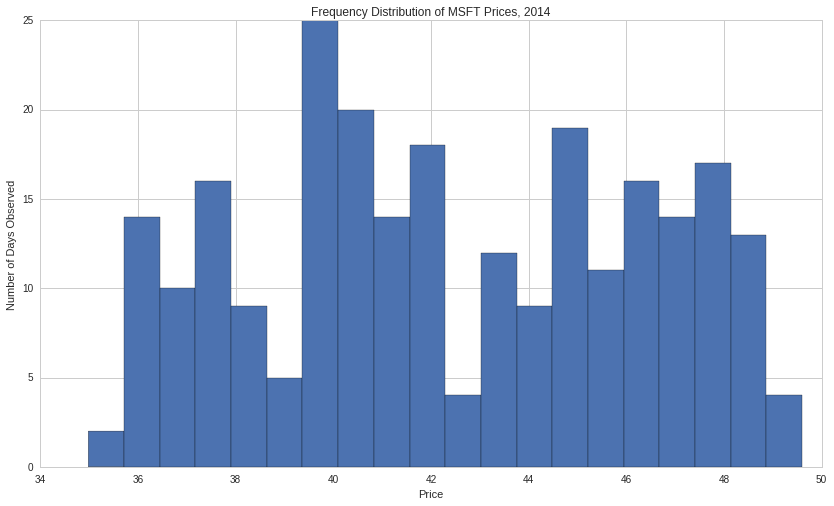

In [5]:
# Plot a histogram using 20 bins
plt.hist(data['MSFT'], bins=20)
plt.xlabel('Price')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of MSFT Prices, 2014');

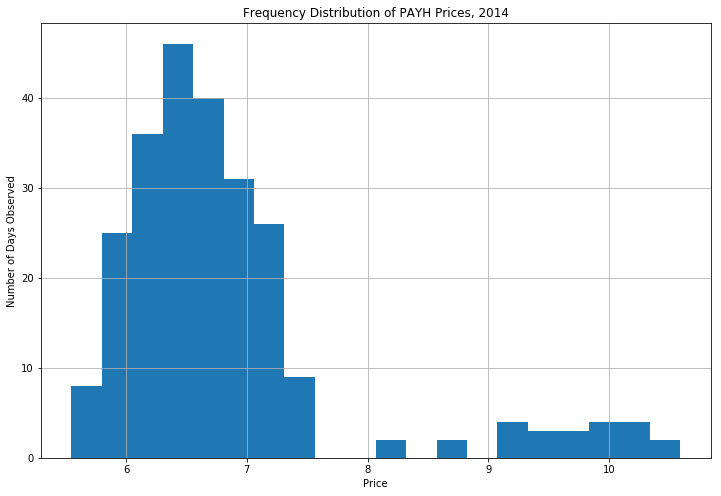

In [9]:
# Plot a histogram using 20 bins
plt.hist(data['PAYH'], bins=20)
plt.xlabel('Price')
plt.ylabel('Number of Days Observed')
plt.grid(True)
plt.title('Frequency Distribution of PAYH Prices, 2014');

### Returns Histogram

In finance rarely will we look at the distribution of prices. The reason for this is that prices are non-stationary and move around a lot. For more info on non-stationarity please see [this lecture](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity). Instead we will use daily returns. Let's try that now.

### 回报的直方图

在金融领域，我们很少会直接去看价格的分布情况。因为价格通常不稳定，价格的波动也很频繁。关于不稳定性可以参考[这节课](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity)的内容.所以，在这里，我们用日回报来代替价格，让我们来看一看：

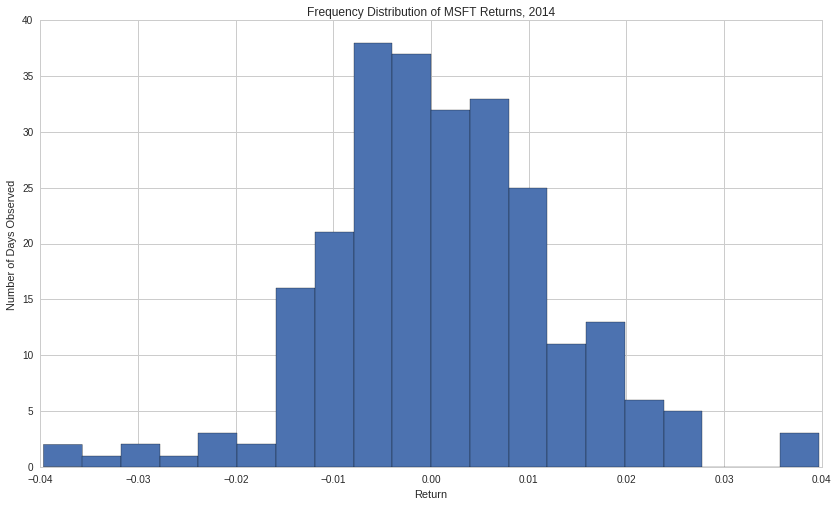

In [6]:
# Remove the first element because percent change from nothing to something is NaN
R = data['MSFT'].pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of MSFT Returns, 2014');

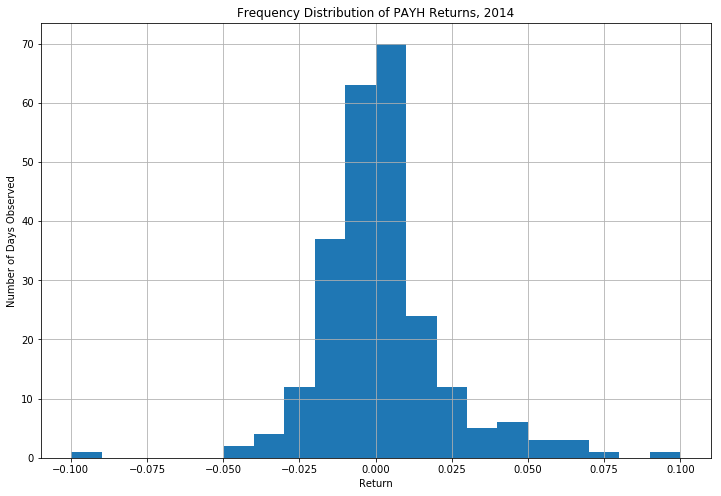

In [10]:
# Remove the first element because percent change from nothing to something is NaN
# 移除首行，因为首行的百分比值是NaN
R = data['PAYH'].pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.grid(True)
plt.title('Frequency Distribution of PAYH Returns, 2014');

The graph above shows, for example, that the daily returns of MSFT were above 0.03 on fewer than 5 days in 2014. Note that we are completely discarding the dates corresponding to these returns. 

##### IMPORTANT: Note also that this does not imply that future returns will have the same distribution.

通过这个直方图，我们可以知道，2014年，微软股价日涨幅超过3%的天数不超过5天。(注意，这里我们舍弃掉日期这个索引，这样我们可以直观的看涨幅的分布情况)

##### 重要提示:我们并不能据此推断未来的股价涨幅分布和这个一样.

### Cumulative Histogram (Discrete Estimated CDF)

An alternative way to display the data would be using a cumulative distribution function, in which the height of a bar represents the number of observations that lie in that bin or in one of the previous ones. This graph is always nondecreasing since you cannot have a negative number of observations. The choice of graph depends on the information you are interested in.

### 累积分布直方图 (离散估计 累积分布函数(CDF))

另外的一种选择就是累积分布函数。顾名思义，就是将观察值的数量进行累加，某一个柱子的高度代表了：在小于等于这根柱子横坐标的区间里所有观察值的数量总和.
$$F(x) = P(X<=x) $$

因为观察值的数量永远不可能为负数，所以这个函数是单调递增的.

$$x_1 < x_2,\quad f(x_1) <= f(x_2)$$

两种方案的选择取决于你感兴趣的信息。

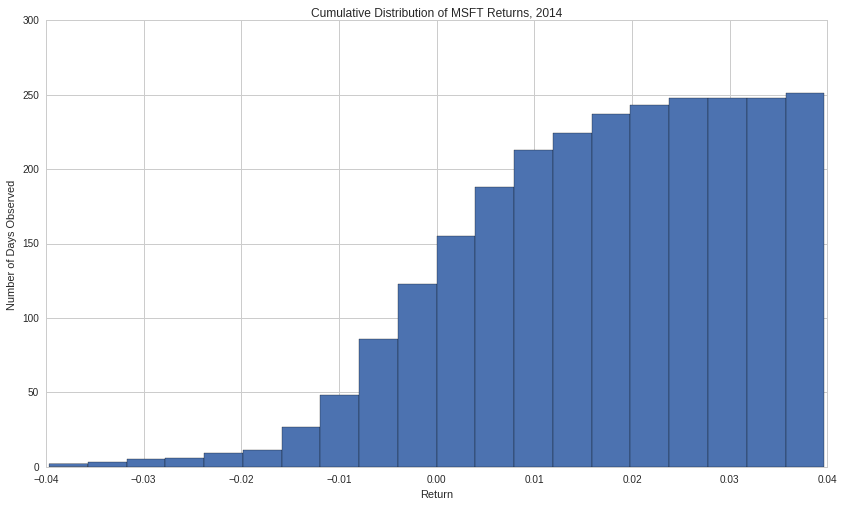

In [7]:
# Remove the first element because percent change from nothing to something is NaN
R = data['MSFT'].pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20, cumulative=True)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Cumulative Distribution of MSFT Returns, 2014');

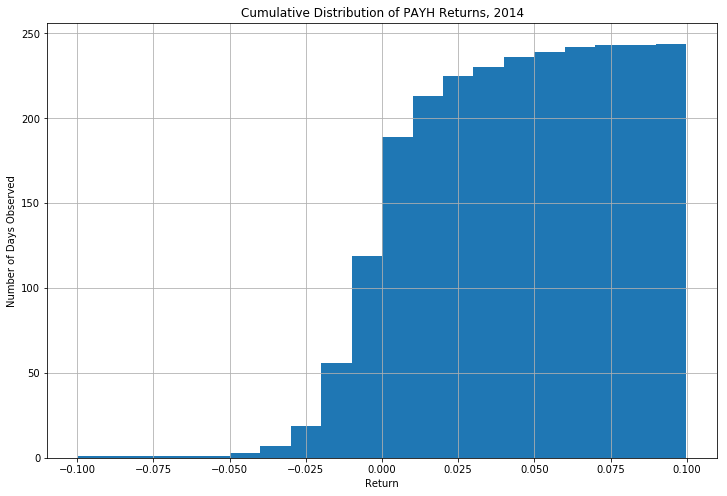

In [14]:
# Remove the first element because percent change from nothing to something is NaN
R = data['PAYH'].pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20, cumulative=True)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.grid(True)
plt.title('Cumulative Distribution of PAYH Returns, 2014');

## Scatter plot

A scatter plot is useful for visualizing the relationship between two data sets. We use two data sets which have some sort of correspondence, such as the date on which the measurement was taken. Each point represents two corresponding values from the two data sets. However, we don't plot the date that the measurements were taken on.

## 散点图

散点图通常刻画的是两组数据之间的关系。在本例中，以微软和苹果的每日股价分别作为每一个点的横纵坐标(比如14-1-2的微软股价作为点的横坐标，苹果股价作为其纵坐标)

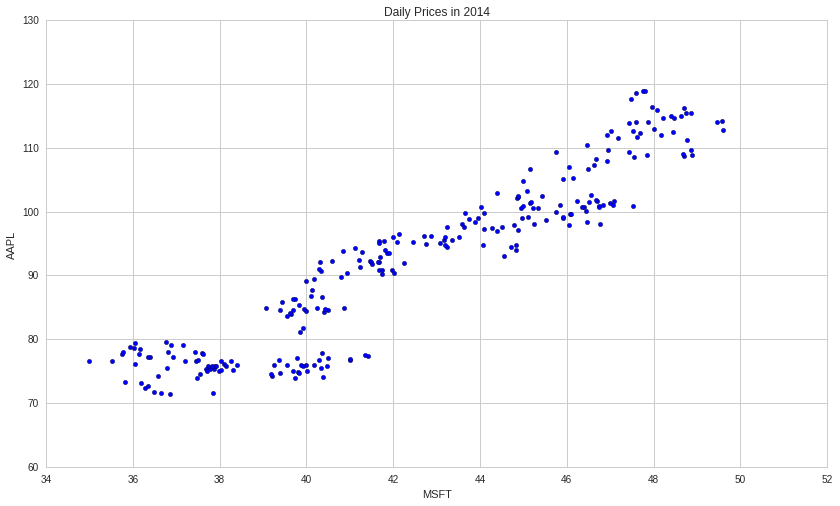

In [8]:
plt.scatter(data['MSFT'], data['AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Daily Prices in 2014');

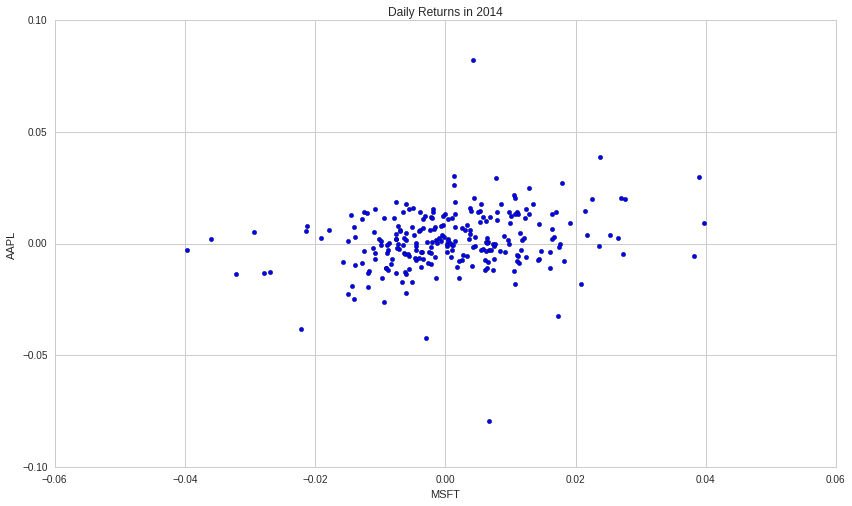

In [9]:
R_msft = data['MSFT'].pct_change()[1:]
R_aapl = data['AAPL'].pct_change()[1:]

plt.scatter(R_msft, R_aapl)
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Daily Returns in 2014');

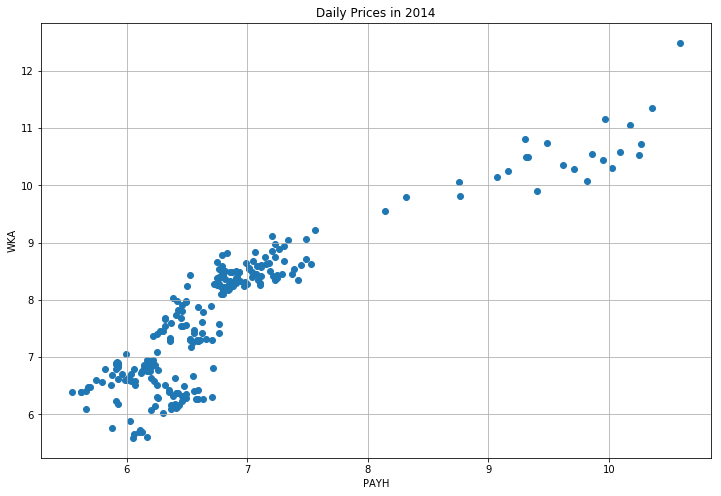

In [15]:
plt.scatter(data['PAYH'], data['WKA'])
plt.xlabel('PAYH')
plt.ylabel('WKA')
plt.grid(True)
plt.title('Daily Prices in 2014');

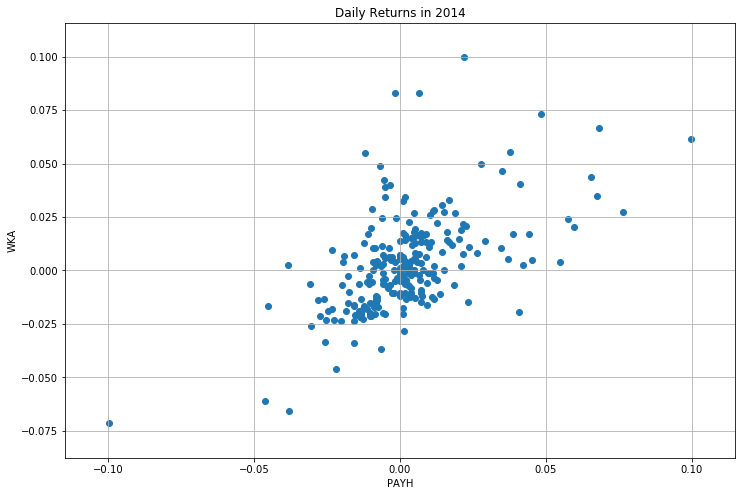

In [17]:
R_payh = data['PAYH'].pct_change()[1:]
R_wka = data['WKA'].pct_change()[1:]

plt.scatter(R_payh, R_wka)
plt.xlabel('PAYH')
plt.ylabel('WKA')
plt.grid(True)
plt.title('Daily Returns in 2014');

## Line graph

A line graph can be used when we want to track the development of the y value as the x value changes. For instance, when we are plotting the price of a stock, showing it as a line graph instead of just plotting the data points makes it easier to follow the price over time. This necessarily involves "connecting the dots" between the data points, which can mask out changes that happened between the time we took measurements.

## 折线图

折线图通常被用来刻画\\(y\\)随着\\(x\\)的变化而变化的趋势.比如说股价的走势图，我们用折线图代替散点图更容易感受股票价格随着时间的波动。在连线的过程中，会让取样点之间的过渡显得更加自然，平滑。

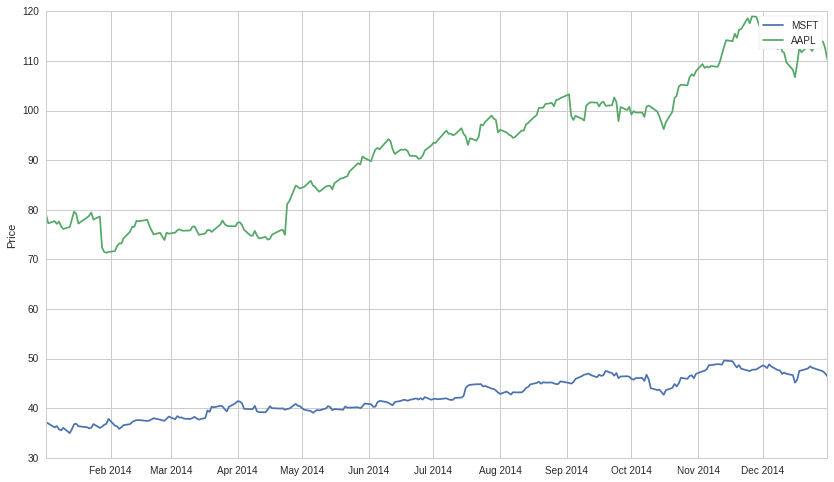

In [10]:
plt.plot(data['MSFT'])
plt.plot(data['AAPL'])
plt.ylabel('Price')
plt.legend(['MSFT', 'AAPL']);

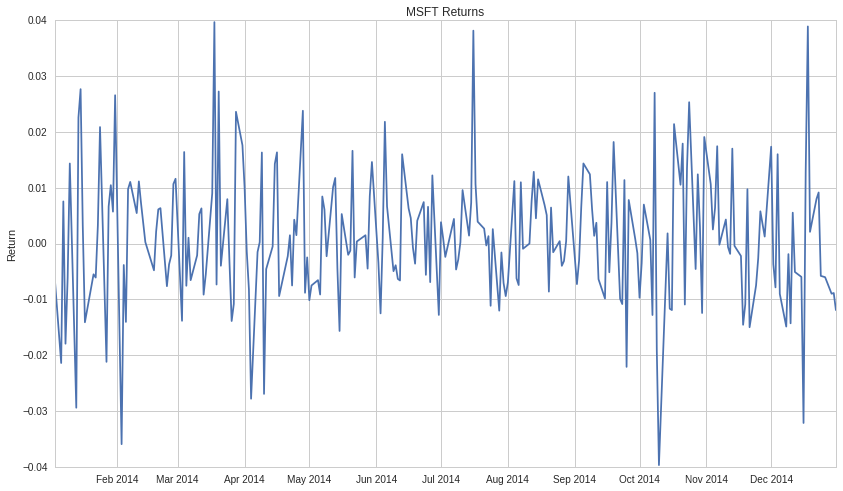

In [11]:
# Remove the first element because percent change from nothing to something is NaN
R = data['MSFT'].pct_change()[1:]

plt.plot(R)
plt.ylabel('Return')
plt.title('MSFT Returns');

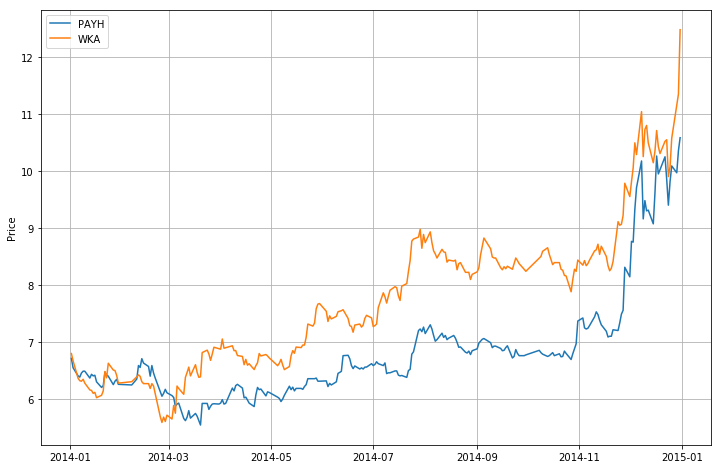

In [18]:
plt.plot(data['PAYH'])
plt.plot(data['WKA'])
plt.ylabel('Price')
plt.grid(True)
plt.legend(['PAYH', 'WKA']);

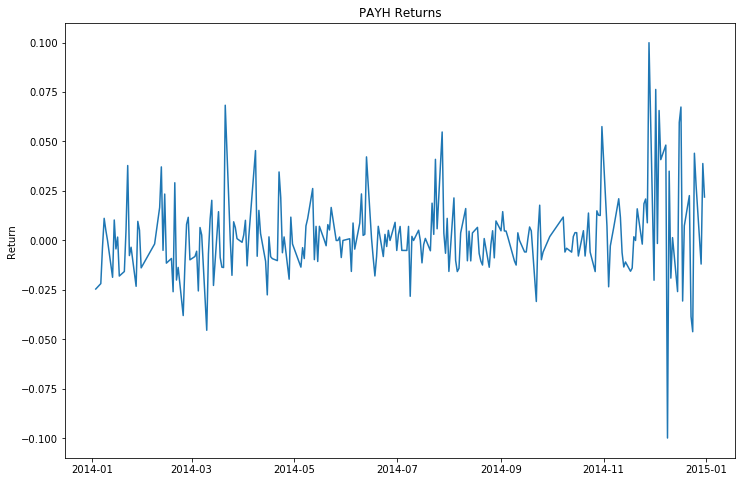

In [19]:
# Remove the first element because percent change from nothing to something is NaN
R = data['PAYH'].pct_change()[1:]

plt.plot(R)
plt.ylabel('Return')
plt.title('PAYH Returns');

## Never Assume Conditions Hold

Again, whenever using plots to visualize data, do not assume you can test a hypothesis by looking at a graph. Also do not assume that because a distribution or trend used to be true, it is still true. In general much more sophisticated and careful validation is required to test whether models hold, plots are mainly useful when initially deciding how your models should work.

## 不要为了验证某个想法去画图

再次强调，无论什么时候，都不要带着假设去画图，画图不是为了验证你的某个想法。同样不要因为某个分布或者趋势在过去是可行的，它就一直是对的。通常来说，需要用更复杂和仔细的方法去验证模型的可行性，画图主要是在建模初期，用于找灵感。

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*